In [1]:
import os, sys
project_dir = os.getcwd()
if project_dir not in sys.path:
    sys.path.append(project_dir)

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

In [3]:
from dataset import DermaDataset

dataset_root_dir = "/home/abian/Data/Dataset/IUMA/DermaDatabase/dataCubes/"
train_dir = ['train', 'validation']
dataset_dir = list(map(lambda x: os.path.join(dataset_root_dir, x), train_dir))

dataset = DermaDataset(dataset_dir)
x, y = dataset.get()

# For GPU computation
# x = x.astype(np.float32)
# y = y.astype(np.float32)

# Correlation
Clusterize that features which correlation is higher than 0.9

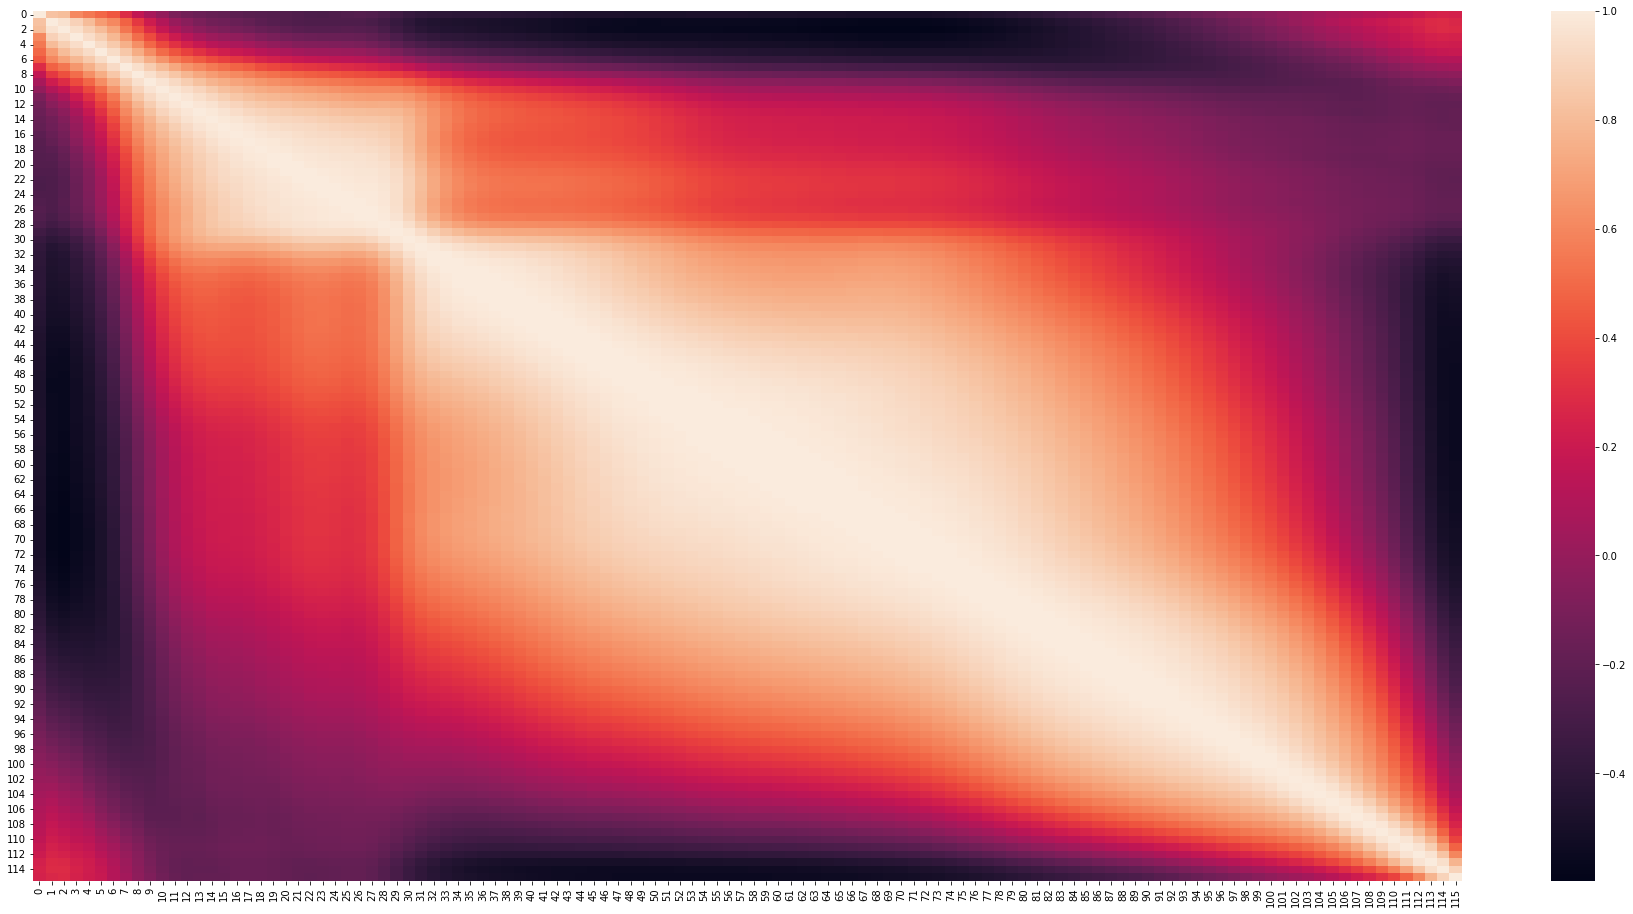

In [26]:
test = pd.DataFrame(x, columns=np.arange(116).astype(str))

import seaborn as sn
from matplotlib import pyplot as plt
corrMatrix = test.corr()
fig, ax = plt.subplots(figsize=(32,16)) 
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [18]:
corrMatrix.shape

(116, 116)

In [47]:
higher_correlated = []
for feature_idx in range(corrMatrix.shape[0]):
    higher_correlated.append(np.where(corrMatrix.iloc[feature_idx, :] > 0.9)[0])

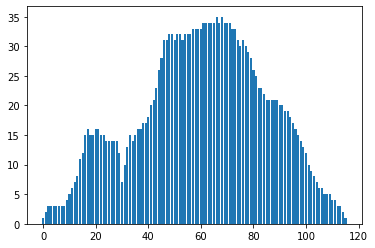

In [60]:
test = list(map(lambda x: x.size, higher_correlated))
plt.bar(np.arange(116), test)
plt.show()

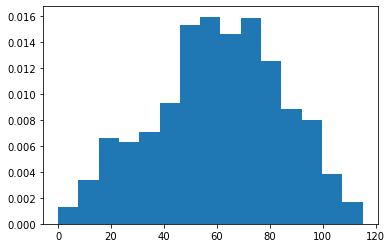

In [59]:
plt.hist(np.concatenate(higher_correlated), density=True, bins=15)
plt.show()

# Dataset balancing
**https://imbalanced-learn.org/stable/under_sampling.html**

In [3]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from undersample import HyperSpectralUnderSampler

# Randomly selecting a subset of data for the targeted classes:
# rus = RandomUnderSampler(random_state=123)
# x, y = rus.fit_resample(x, y)

# Let positive samples be the samples belonging to the targeted class to be under-sampled. 
# Negative sample refers to the samples from the minority class.
# Select the positive samples for which the average distance to the N closest samples of the negative class is the smallest
# sampling_strategy = {0: 250, 1: 250}
# nm1 = NearMiss(sampling_strategy=sampling_strategy, version=1)
# nm1 = NearMiss(version=1)
# x, y = nm1.fit_resample(x, y)

# ....
undersampler = HyperSpectralUnderSampler(n_clusters=50, samples_per_cluster=10, random_state=123)
x, y = undersampler.fit_resample(x,y)

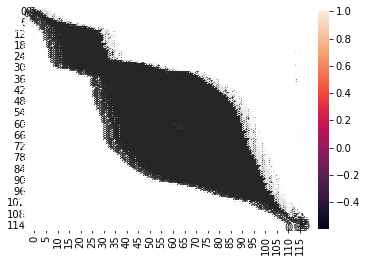

In [24]:
test = pd.DataFrame(x, columns=np.arange(116).astype(str))
import seaborn as sn
corrMatrix = test.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


In [25]:
corrMatrix

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.783025,0.755751,0.498982,0.435113,0.377837,0.328411,0.194284,0.084549,-0.000663,...,0.042970,0.042303,0.042967,0.048729,0.061438,0.082058,0.115752,0.148687,0.167943,0.149569
1,0.783025,1.000000,0.953251,0.862210,0.753531,0.618772,0.559828,0.437217,0.314517,0.207359,...,0.146967,0.152976,0.157259,0.162384,0.165783,0.178303,0.198850,0.211091,0.205584,0.149688
2,0.755751,0.953251,1.000000,0.928037,0.848411,0.774312,0.681216,0.533067,0.419325,0.321715,...,0.089353,0.105593,0.122722,0.142122,0.157711,0.180546,0.209044,0.235771,0.240688,0.200985
3,0.498982,0.862210,0.928037,1.000000,0.930169,0.869345,0.785453,0.676030,0.538851,0.455494,...,0.092717,0.106230,0.122517,0.140678,0.152263,0.170924,0.191926,0.208603,0.206713,0.164719
4,0.435113,0.753531,0.848411,0.930169,1.000000,0.929191,0.869792,0.779993,0.667295,0.561419,...,0.057757,0.082585,0.110819,0.141441,0.160865,0.178490,0.193949,0.195367,0.173581,0.119045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.082058,0.178303,0.180546,0.170924,0.178490,0.135061,0.097021,0.044200,0.017389,-0.030548,...,0.463413,0.584122,0.727899,0.864665,0.960621,1.000000,0.962018,0.844116,0.592331,0.251466
112,0.115752,0.198850,0.209044,0.191926,0.193949,0.160210,0.111024,0.062333,0.025237,-0.021328,...,0.340423,0.441021,0.579548,0.731547,0.865013,0.962018,1.000000,0.947006,0.758510,0.401728
113,0.148687,0.211091,0.235771,0.208603,0.195367,0.180098,0.115555,0.063112,0.019339,-0.023274,...,0.230595,0.306179,0.415539,0.557161,0.704909,0.844116,0.947006,1.000000,0.919187,0.648757
114,0.167943,0.205584,0.240688,0.206713,0.173581,0.178422,0.101277,0.048409,0.000807,-0.031292,...,0.108963,0.146566,0.209139,0.303277,0.429285,0.592331,0.758510,0.919187,1.000000,0.845849


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Feature Reduction

Due to a computational limitation, it is now only possible to apply the selection of features by Bayesian optimization up to 64 features. This step is used in order to reduce the number of features based on Tree-based feature importance score.

In [27]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
# from cuml.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# clf = ExtraTreesClassifier(n_estimators=150)
clf = RandomForestClassifier(random_state=123)
# clf = RandomForestClassifier(random_state=123, n_streams=1)
# clf_params={'n_estimators':[50, 150, 500, 1000]}
clf_params={'n_estimators':[10, 15, 50, 100]}

fs_clf = GridSearchCV(clf, clf_params, cv=10, n_jobs=-1)
fs_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1, param_grid={'n_estimators': [10, 15, 50, 100]})

In [28]:
from sklearn.model_selection import train_test_split

fi = fs_clf.best_estimator_
print("Best estimator: {}".format(fi))
print("RF train accuracy: %0.3f" % fi.score(X_train, y_train))
print("RF test accuracy: %0.3f" % fi.score(X_test, y_test))

Best estimator: RandomForestClassifier(n_estimators=50, random_state=123)
RF train accuracy: 1.000
RF test accuracy: 0.905


## Random Forest Feature Importance (MDI)

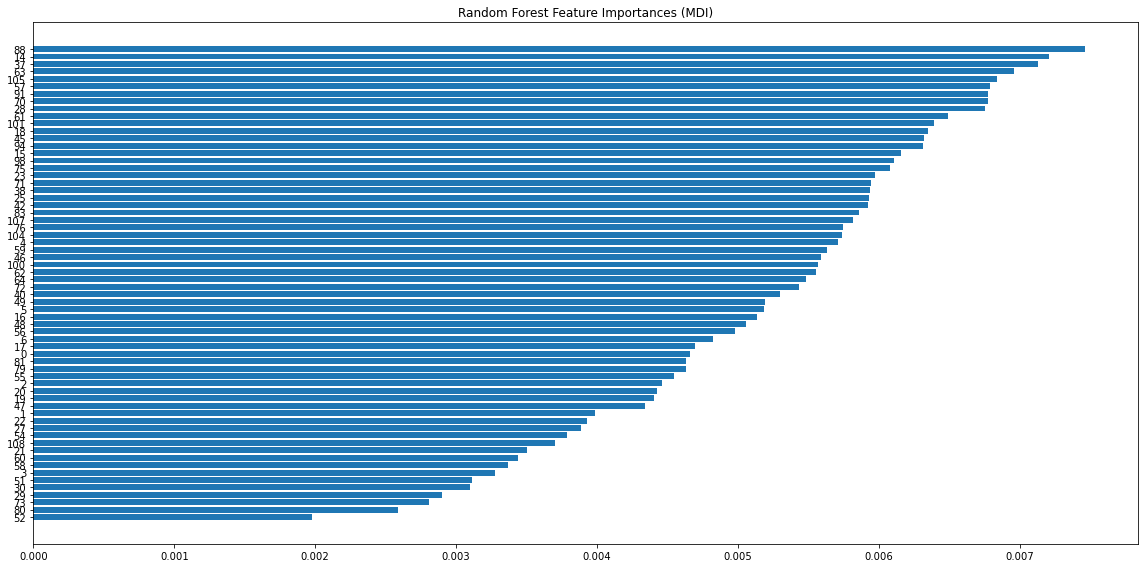

In [29]:
feature_importance = fi.feature_importances_
sorted_idx = feature_importance.argsort()

from matplotlib import pyplot as plt 

n_features = 64

y_ticks = np.arange(0, n_features)
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(y_ticks, feature_importance[sorted_idx[:n_features]])
ax.set_yticks(y_ticks)
ax.set_yticklabels(sorted_idx[:n_features])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

## Permutation Importance

In [38]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    fi, X_test, y_test, n_repeats=10, random_state=123, n_jobs=8
)
sorted_idx = result.importances_mean.argsort()[::-1]

In [41]:
sorted_idx[:64]

array([114,  55,  98,  11, 112, 113, 115,  12,  26,  97,  68, 109,  95,
       111,  58, 100,  35,  60,  10,  85,  70,  57,  66,  33,  29,  86,
        43,  50,  51,  37,  92,  45,  39,  48,  89,  36,  72,   8,  59,
        79,  41,  65,   9,  82,  56,  14,  13,  94,  91,  28,  40,  99,
        84, 108,  61,  19, 102,  42,  83, 104, 107,  44,  49, 106])

In [42]:
result.importances_mean[sorted_idx[:64]]

array([0.0215, 0.018 , 0.017 , 0.0165, 0.0155, 0.014 , 0.0135, 0.0135,
       0.012 , 0.0115, 0.0115, 0.011 , 0.01  , 0.01  , 0.0095, 0.0095,
       0.0095, 0.009 , 0.009 , 0.0085, 0.0085, 0.0085, 0.008 , 0.008 ,
       0.0075, 0.0075, 0.0075, 0.007 , 0.007 , 0.007 , 0.0065, 0.0065,
       0.006 , 0.006 , 0.006 , 0.006 , 0.0055, 0.0055, 0.0055, 0.0055,
       0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 ,
       0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.004 , 0.004 , 0.004 ,
       0.004 , 0.004 , 0.004 , 0.004 , 0.004 , 0.0035, 0.0035, 0.0035])

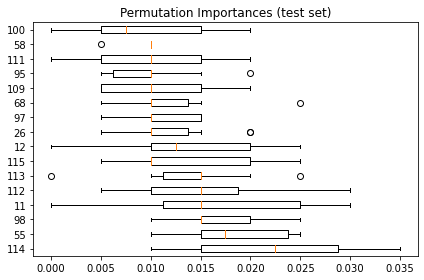

In [39]:
fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx[:16]].T, vert=False, labels=sorted_idx[:16]
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [25]:
print("Best estimator: {}".format(fs_clf.best_estimator_))
fi = fs_clf.best_estimator_.feature_importances_

Best estimator: RandomForestClassifier()


In [ ]:
threshold = 0.0075 #Empirical value
fs_model = SelectFromModel(fs_clf.best_estimator_, threshold=threshold, prefit=True)
X_new = fs_model.transform(x)

print("Features selected: {}".format(np.where(fs_clf.best_estimator_.feature_importances_ > threshold)[0]))
print("X shape: {}".format(X_new.shape))

n_features=X_new.shape[1]

# Proposed metric
## Accuracy penalized by number of features


$\begin{align}
    Acc_{penalized} = Acc - \frac{2 \alpha Acc}{1 + \lambda / \lambda_{max}}
\end{align}$

where $Acc$ is the accuracy, $\lambda_{max}$ the number of features of the original samples, $\lambda$ the number of features selectioned and $alpha$ is a paramter of regularization.

In [ ]:
def accuracy_penalized(acc, n_features_selected, n_features, alpha=.5):
    penalization = (2*alpha*acc / (1 + (n_features/n_features_selected)))
    return acc - penalization

# Parameters optimization

In [ ]:
from feature_selection import FeatureSelection, FeatureEquidistantSelection
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

In [ ]:
search_space = list()
# search_space.append(Integer(1, float(2**(116)-1), 'log-uniform', name='transform__selected_features'))
search_space.append(Integer(1, 2**(n_features)-1, 'log-uniform', name='transform__selected_features', dtype=np.uint64))
search_space.append(Real(1e-6, 100.0, 'log-uniform', name='svc__C'))
search_space.append(Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='svc__kernel'))
search_space.append(Integer(1, 5, name='svc__degree'))
search_space.append(Real(1e-6, 100.0, 'log-uniform', name='svc__gamma'))

In [ ]:
# define the function used to evaluate a given configuration
@use_named_args(search_space) # https://scikit-optimize.github.io/stable/modules/generated/skopt.utils.use_named_args.html
def evaluate_model(**params):
	# configure the model with specific hyperparameters
	model = Pipeline([("transform", FeatureSelection(n_features=n_features)), ('svc', SVC())])
	model.set_params(**params)
	# define test harness
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X_new, y, cv=cv, n_jobs=-1, scoring='accuracy')
	# calculate the mean of the scores
	estimate = np.mean(result)
	
	# Accuracy penalization based on number of features selected
	if model['transform'].selected_features:		
		feature_idx = model['transform'].getIndex()
		estimate = accuracy_penalized(estimate, feature_idx.sum(), model['transform'].n_features, alpha=.25)

	# convert from a maximizing score to a minimizing score
	return 1.0 - estimate


In [ ]:
from skopt.callbacks import CheckpointSaver
from datetime import datetime

exp_id = f'{datetime.now().timestamp()}'.split('.')[0]
checkpoint_saver = CheckpointSaver("./checkpoints/{}.pkl".format(exp_id), compress=9) # keyword arguments will be passed to `skopt.dump`

result = gp_minimize(evaluate_model, search_space, callback=[checkpoint_saver], random_state=123)

In [ ]:
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

# Continue search from checkpoint

In [ ]:
from skopt import load
res = load('checkpoints/1633957078.pkl') # Select a checkpint 
x0 = res.x_iters
y0 = res.func_vals
print(x0)
print(y0)

In [ ]:
result = gp_minimize(
            evaluate_model, 
            search_space,
            x0=x0,              # already examined values for x
            y0=y0,              # observed values for x0
            callback=[checkpoint_saver], 
            random_state=123)